# Final project

### Part one: Zhimin Li - zhl157

### First: how to figure out what is the best neighbothood in Pittsburgh?
After we discuss with our teammates. We think that we need to analysis in thre metrics.
My metric is about air quality about pittsburgh.So I upload the dataset about air quality in Pitts.

### Second: how to handle with all the data.

In [68]:
# import this csv file

import pandas as pd
import numpy as np

import ssl

ssl._create_default_https_context = ssl._create_unverified_context
pgh_AirQuality_data = pd.read_csv("https://data.wprdc.org/datastore/dump/967f1285-f8fb-4785-9673-64a8ae47588d",
                           index_col="site", 
                           parse_dates=True)
pgh_AirQuality_data.head()

,datetime,stat,bcstat,bcstat_txt,bp,bp_txt,co,co_txt,h2s,h2s_txt,...,sonicws,sonicws_txt,uvpm,uvpm_txt,rainfall,rainfall_txt,solarrad,solarrad_txt,uv_rad,uv_rad_txt
site,,,,,,,,,,,,,,,,,,,,,
Avalon,2016-01-15T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-30T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T00:00:00,Min,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T00:00:00,Max,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### After I see so many data, I am comfused for a second= =. But if I need to find the best air quality in Pitts, I must know the basic algorithm of the air quality index.

##### Therefore, I search the air quality index in Google,and I got this: According to the graded concentration limits of various pollutants, fine particulate matter (PM2.5), inhalable particulate matter (PM10), sulfur dioxide (SO2), nitrogen dioxide (NO2), ozone (O3), carbon monoxide (CO), etc. The actual measured concentration values ​​of the pollutants (PM2.5 and PM10 are the 24-hour average concentrations) were calculated to obtain the Individual Air Quality Index, IAQI.

##### So I will handle with pm2.5, pm10, SO2, NO2, ozone and CO to complete this group project.
##### The lower of the index, the better of the neighborhood.

In [69]:
# let cancel some columns

pgh_AirQuality_data_new=pd.DataFrame(pgh_AirQuality_data, columns=['pm25','pm10','so2','no2','ozone','co'])
pgh_AirQuality_data_new

,pm25,pm10,so2,no2,ozone,co
site,,,,,,
Avalon,NaN,NaN,24.000,NaN,NaN,NaN
Avalon,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,0.000,NaN,NaN,NaN
Avalon,NaN,NaN,0.003,NaN,NaN,NaN
...,...,...,...,...,...,...
South Fayette,NaN,NaN,0.000,NaN,0.049,NaN
South Fayette,NaN,NaN,19.000,NaN,19.000,NaN
South Fayette,NaN,NaN,0.000,NaN,0.036,NaN


#### After this, I will arrange the data in ascending order one by one in columns.
#### methods: because there are some none data in the dataset, we dirctely use .mean to calculate the  result (.mean will skip the 'none')

In [70]:
# calculate the average of every row

ave=pgh_AirQuality_data_new.mean(1)
ave

site
Avalon           24.0000
Avalon               NaN
Avalon               NaN
Avalon            0.0000
Avalon            0.0030
                  ...   
South Fayette     0.0245
South Fayette    19.0000
South Fayette     0.0180
South Fayette    20.0000
South Fayette        NaN
Length: 132762, dtype: float64

#### And then we sort this data (we don't need to care about the none data).

In [72]:
# add the 'ave' row in dataset

pgh_AirQuality_data_new['ave']=ave
pgh_AirQuality_data_new

,pm25,pm10,so2,no2,ozone,co,ave
site,,,,,,,
Avalon,NaN,NaN,24.000,NaN,NaN,NaN,24.0000
Avalon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,0.000,NaN,NaN,NaN,0.0000
Avalon,NaN,NaN,0.003,NaN,NaN,NaN,0.0030
...,...,...,...,...,...,...,...
South Fayette,NaN,NaN,0.000,NaN,0.049,NaN,0.0245
South Fayette,NaN,NaN,19.000,NaN,19.000,NaN,19.0000
South Fayette,NaN,NaN,0.000,NaN,0.036,NaN,0.0180


In [77]:
# sort the dataset 

pgh_AirQuality_data_sortt=pgh_AirQuality_data_new.sort_values(by="ave")
pgh_AirQuality_data_sort.head(100)

,pm25,pm10,so2,no2,ozone,co,ave
site,,,,,,,
Flag Plaza,NaN,-6.0,NaN,NaN,NaN,NaN,-6.0
Glassport High Street,NaN,-6.0,NaN,NaN,NaN,NaN,-6.0
Glassport High Street,NaN,-4.0,NaN,NaN,NaN,NaN,-4.0
Lincoln,0.0,-8.0,NaN,NaN,NaN,NaN,-4.0
Liberty 2,NaN,-4.0,NaN,NaN,NaN,NaN,-4.0
...,...,...,...,...,...,...,...
Liberty 2,1.0,-4.0,NaN,NaN,NaN,NaN,-1.5
Liberty 2,0.0,-3.0,NaN,NaN,NaN,NaN,-1.5
Lincoln,-1.0,-2.0,NaN,NaN,NaN,NaN,-1.5


#### And then we cancel all the columns but 'ave'.

In [92]:
# delete extra columns

pgh_AirQuality_data_del=pgh_AirQuality_data_result.drop(columns=['pm25','pm10','so2','no2','ozone','co'])
pgh_AirQuality_data_del

,ave
site,
Flag Plaza,-6.0
Glassport High Street,-6.0
Glassport High Street,-4.0
Lincoln,-4.0
Liberty 2,-4.0
...,...
Liberty 2,NaN
Lincoln,NaN
North Braddock,NaN


#### We have learned .groupby, so we use it to merge functions with the same site name.

In [95]:
pgh_AirQuality_data_sum=pgh_AirQuality_data_del.groupby('site').sum()
pgh_AirQuality_data_sum

,ave
site,
Avalon,66769.44900
Clairton,12358.07200
Flag Plaza,174325.08020
Glassport High Street,147367.00000
Harrison Township,74842.07450
Lawrenceville,58134.90800
Lawrenceville 2,54628.47115
Liberty,56869.63000
Liberty 2,139963.50000


#### It is like the sum of pollution of every neighborhood in Pittsburgh (we generally solve the time problem! Because it is the sum).
#### Therefore, we just need to plot it, and we will get the lowest elements (the clean neighborhood).

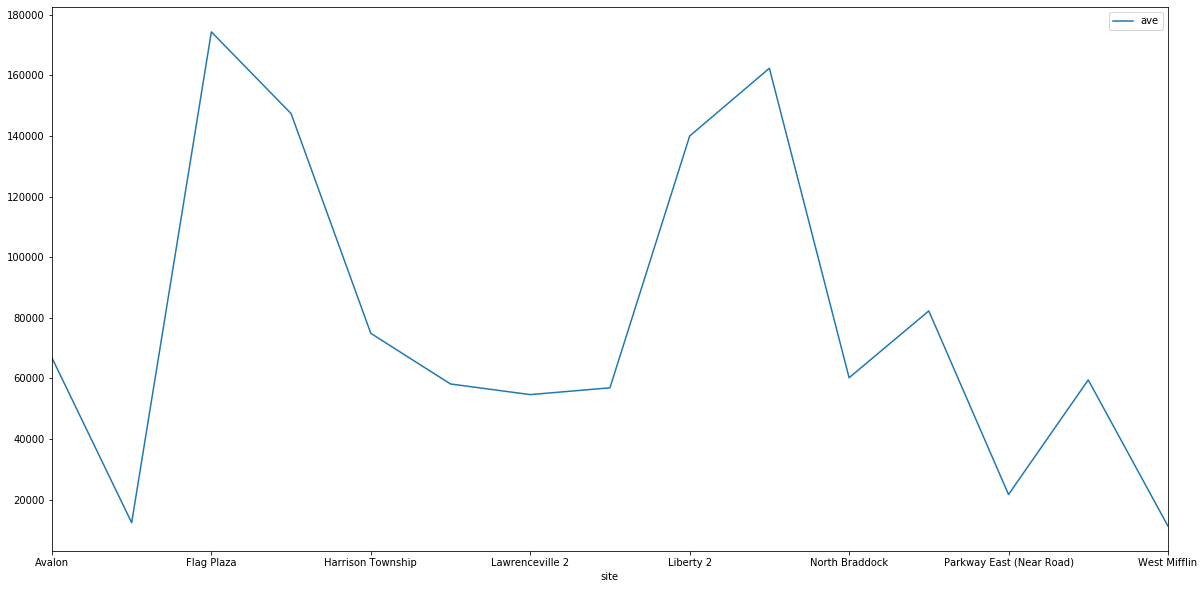

In [99]:
# plot it!

pgh_AirQuality_data_sum.plot(figsize=(20,10))

### Fianl
### We get three target neighborhoods in Pittsburgh: Clairton, West Mifflin and Parkway East (Near Road)

#### I am waiting my teammates results, and we will decide what is the best next week!